In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### Dataset 
Link:https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope
Attribute names can be found in the link. 

In [9]:
df = pd.read_csv("magic04.data")
df

28.7967   16.0021  2.6449  0.3918  0.1982   27.7004    22.011  \
0       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
1      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
2       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
3       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
4       51.6240   21.1502  2.9085  0.2420  0.1340   50.8761   43.1887   
...         ...       ...     ...     ...     ...       ...       ...   
19014   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19015   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19016   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19017  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19018  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       -8.2027   40.092   81.8828  g  
0      -9.9574   6.3609  205.2610  g  
1     -45.2160  76.9600  256.7880  g  
2      -7.1513  10.4490  116.7370  g  
3      21.8393   4.6480  356.4620  g  
4       9.8145   3.6130  238.0980  g  
...        ...      ...       ... ..  
19014   2.8766   2.4229  106.8258  h  
19015  -2.9632  86.7975  247.4560  h  
19016  -9.4662  30.2987  256.5166  h  
19017 -63.8389  84.6874  408.3166  h  
19018  31.4755  52.7310  272.3174  h  

[19019 rows x 11 columns]

In [10]:
attributes = ["fLenth", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df.columns = attributes

In [11]:
print(df["class"].unique())
# Dataset has two class variables 'g' and 'h'. We change them to 0 and 1 so our machine understands them better
df["class"] = (df["class"] == "g").astype(int) # Since there are two unique classes this will change class 'g' to 1 and class 'h' to zero
print(df["class"].unique())

['g' 'h']
[1 0]


In [12]:
df.head()

fLenth    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
1  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
2   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
3   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   
4   51.6240   21.1502  2.9085  0.2420  0.1340   50.8761  43.1887    9.8145   

    fAlpha    fDist  class  
0   6.3609  205.261      1  
1  76.9600  256.788      1  
2  10.4490  116.737      1  
3   4.6480  356.462      1  
4   3.6130  238.098      1

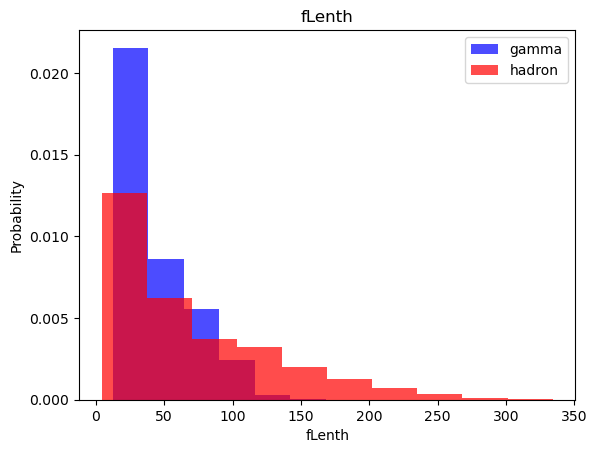

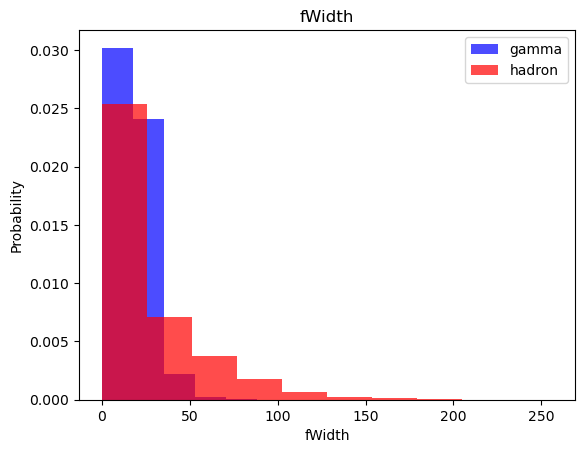

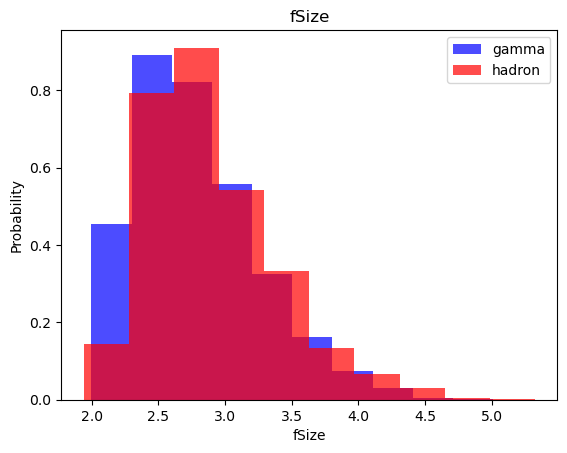

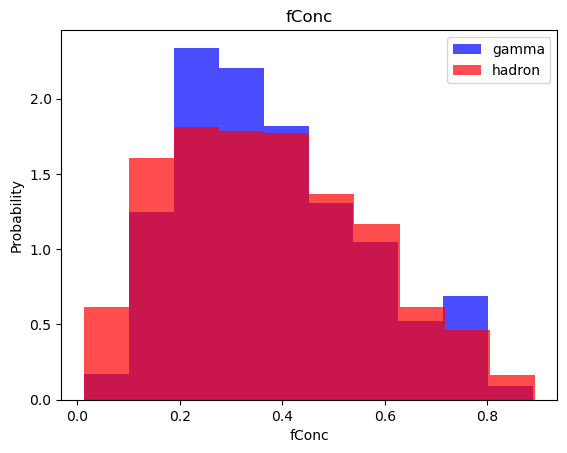

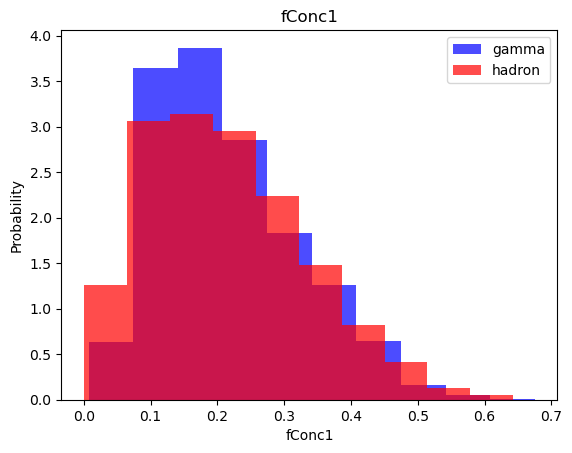

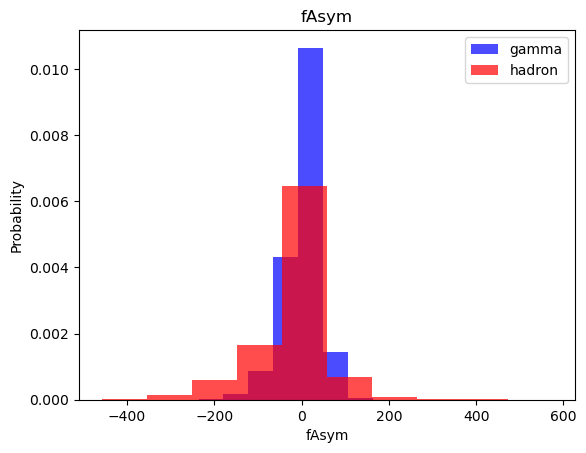

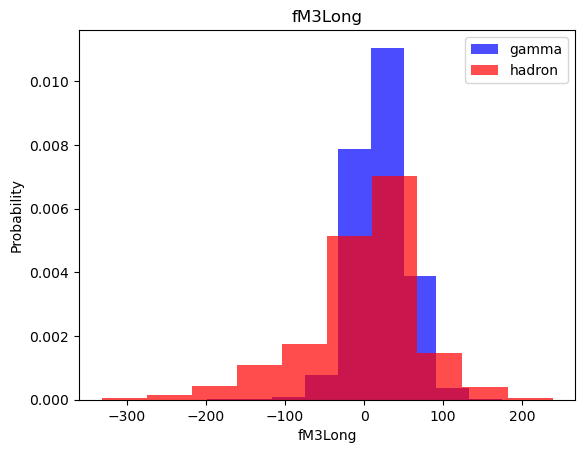

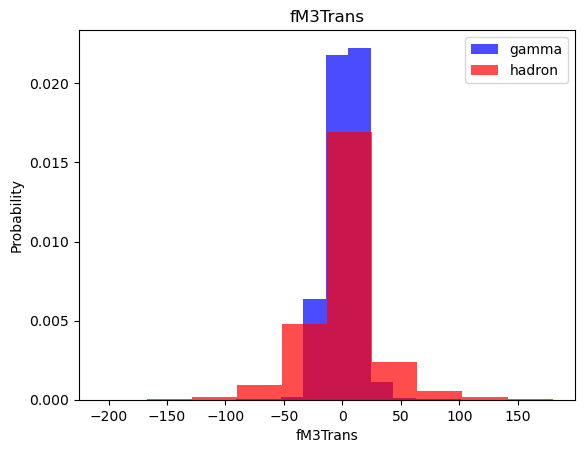

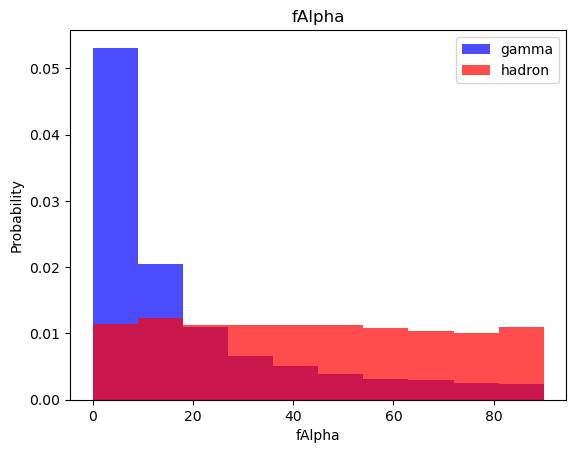

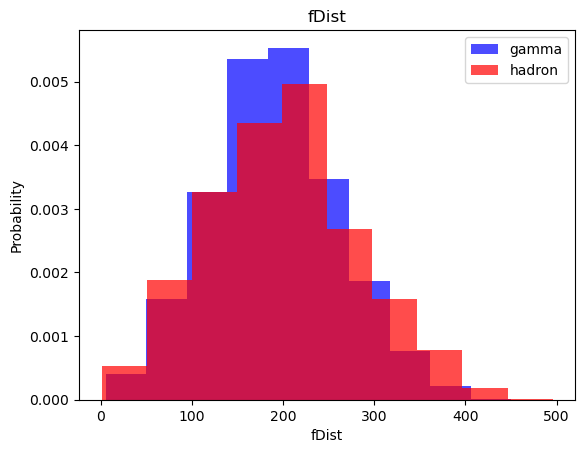

In [13]:
#plotting
for label in attributes[:-1]:
    plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [14]:
#Train, validation, test datasets
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))]) #shuffles the datase. Then train has 0.6 of the dataset, 
                                                                                    #val has 0.2, between 0.6 and 0.8
                                                                                    # test has 0.2, between 0.8 and 1 

C:\Users\sayed\anaconda3\envs\cuda\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [15]:
print(len(train[train["class"]==1])) # gamma
print(len(train[train["class"]==0])) # hadron
#It can be seen from the below result that our training dataset is imbalanced. And one of the balancing is to use oversampling

7425
3986


In [16]:
# scalling dataset because the values are too apart from each other
def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scalar = StandardScaler()
    x = scalar.fit_transform(x) # (x-u)/s u is the mean and s is the standard deviation

    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y) # resamples the lesser class
    data = np.hstack((x, np.reshape(y, (-1, 1)))) # y needs to be changed to a 2D array, because hstack can't combine 1D with a 2D array

    return data, x, y

In [17]:
train, x_train, y_train = scale_dataset(train, oversample=True)
val, x_val, y_val = scale_dataset(val, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

In [18]:
# now the 'class' values for y_train should be balanced. It should have the same amount of 1s and 0s.
print(f'number of gammas in the training dataset:', sum(y_train==1))
print(f'number of hadrons in the training dataset:', sum(y_train==0))
print(f'number of gammas in the validation dataset:', sum(y_val==1))
print(f'number of hadrons in the validation dataset:', sum(y_val==0))
print(f'number of gammas in the test dataset:', sum(y_test==1))
print(f'number of hadronss in the test dataset:', sum(y_test==0))

number of gammas in the training dataset: 7425
number of hadrons in the training dataset: 7425
number of gammas in the validation dataset: 2471
number of hadrons in the validation dataset: 1333
number of gammas in the test dataset: 2435
number of hadronss in the test dataset: 1369


### K-nearest neighbours
It calculates the Euclidean distance between a new sample and k nearest neighbours and takes the same label and the majority. 

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1369
           1       0.85      0.86      0.85      2435

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



### Navie Bayes 
Link: https://www.youtube.com/watch?v=mLt6Ck5YZ8s&ab_channel=SebastianMantey

In [20]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.41      0.51      1369
           1       0.73      0.89      0.80      2435

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



### Logistic Regression
link: https://www.youtube.com/watch?v=yIYKR4sgzI8&ab_channel=StatQuestwithJoshStarmer

In [21]:
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.70      1369
           1       0.83      0.81      0.82      2435

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



### Support Vector Machines (SVM)
-finds a hyperplane between the data points to differentiate them. 
-not very good with outliers

In [22]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1369
           1       0.88      0.90      0.89      2435

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



### Neural Nets

In [23]:
import tensorflow as tf

In [35]:
#plotting losses and accuracy over different epochs or training cycles
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    plt.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    plt.grid(True)
    
    plt.show()

In [30]:
# Neural network model
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    
    nn_model = tf.keras.Sequential([
        tf.keras.Input(shape=(10,)),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', 
                    metrics=['accuracy']) 

    history = nn_model.fit(
        x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=False
    )
    
    return nn_model, history

16 nodes, dropout 0, lr 0.01, batch_size 32


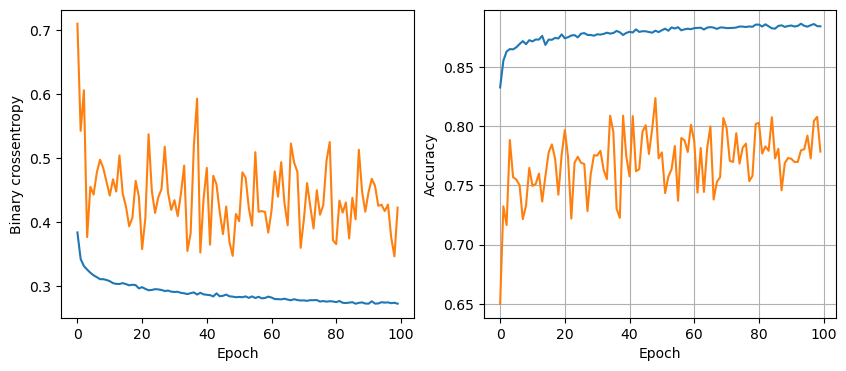

465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8899 - loss: 0.2653
16 nodes, dropout 0, lr 0.01, batch_size 64


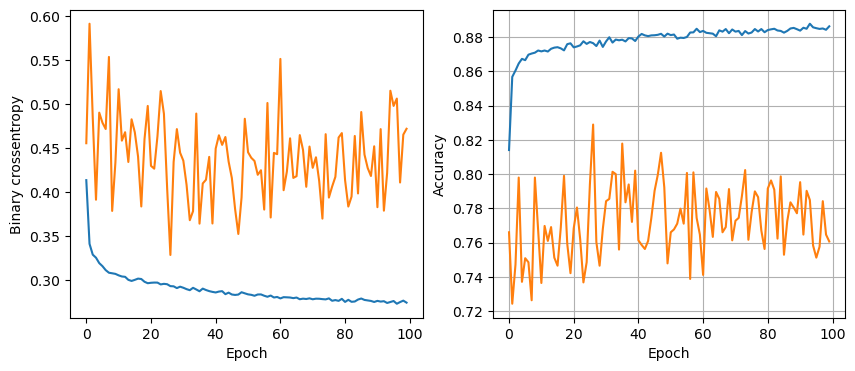

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.8878 - loss: 0.2694
16 nodes, dropout 0, lr 0.01, batch_size 128


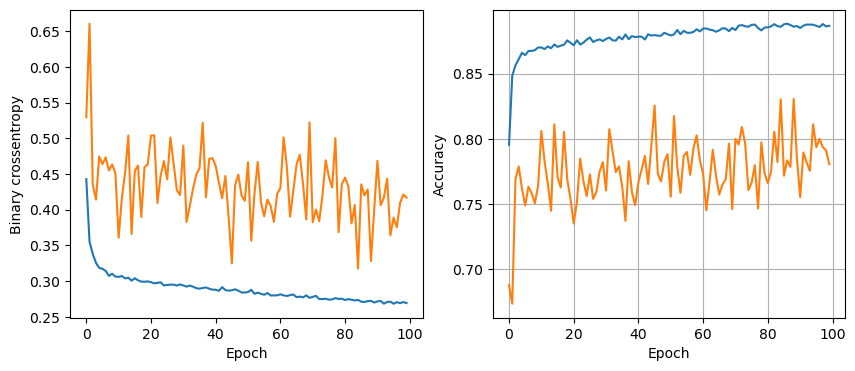

465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8893 - loss: 0.2635
16 nodes, dropout 0, lr 0.005, batch_size 32


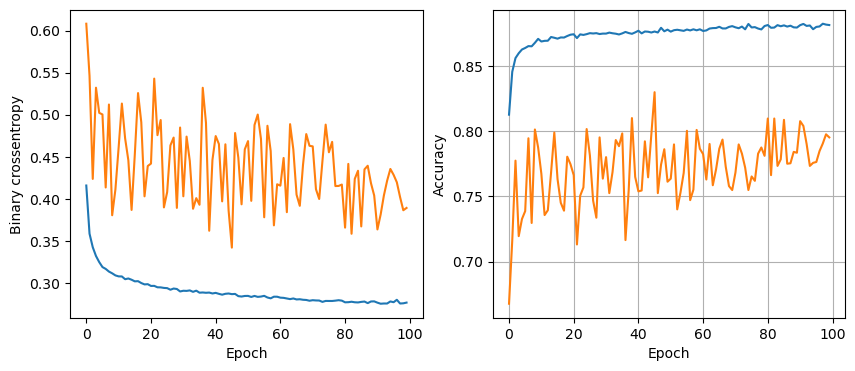

465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8832 - loss: 0.2719
16 nodes, dropout 0, lr 0.005, batch_size 64


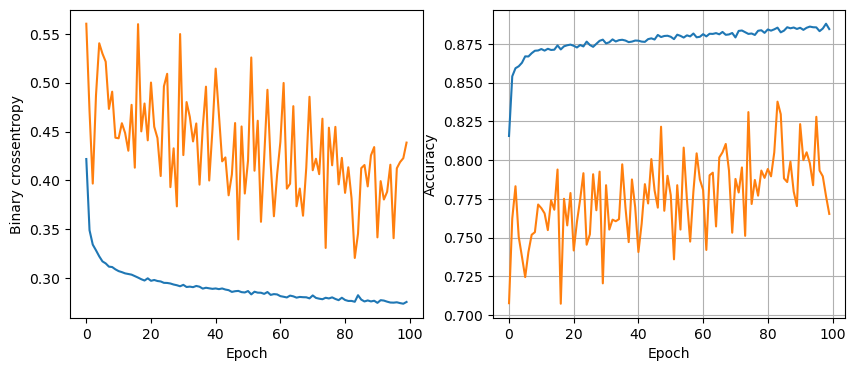

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.8852 - loss: 0.2756
16 nodes, dropout 0, lr 0.005, batch_size 128


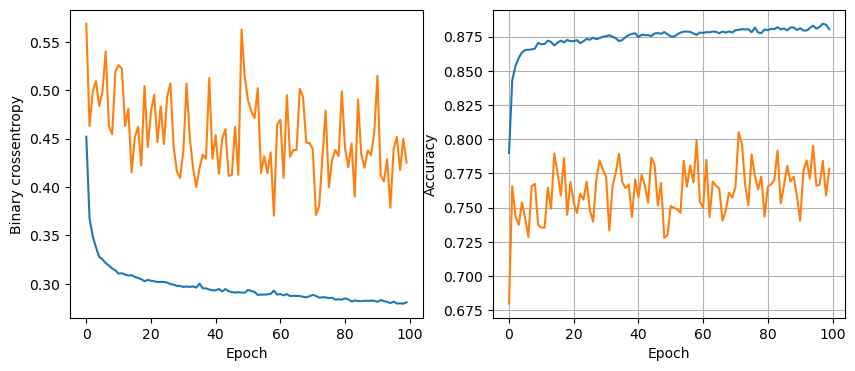

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.8848 - loss: 0.2754
16 nodes, dropout 0, lr 0.001, batch_size 32


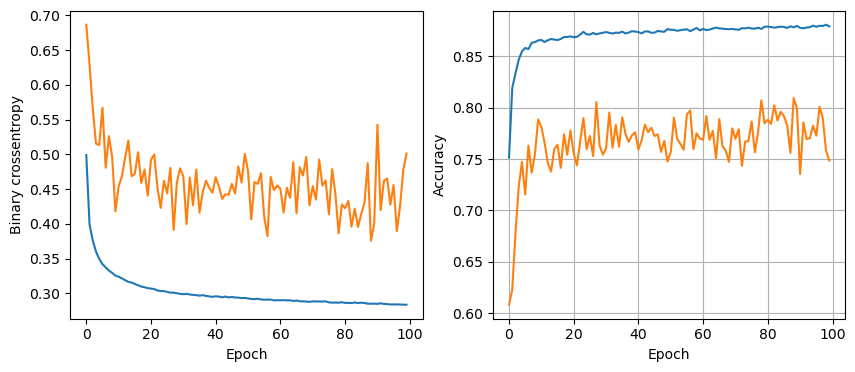

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.8793 - loss: 0.2836
16 nodes, dropout 0, lr 0.001, batch_size 64


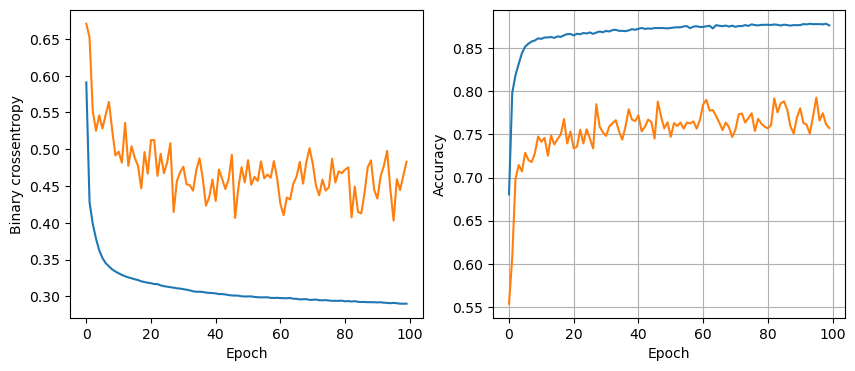

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.8791 - loss: 0.2881
16 nodes, dropout 0, lr 0.001, batch_size 128


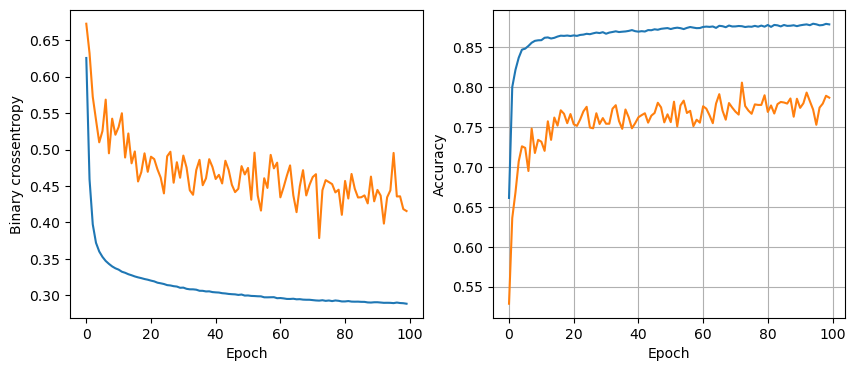

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.8787 - loss: 0.2868
16 nodes, dropout 0.2, lr 0.01, batch_size 32


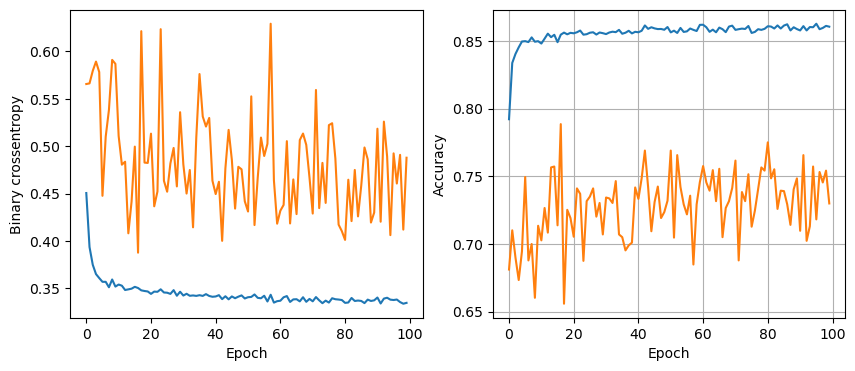

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - accuracy: 0.8714 - loss: 0.3080
16 nodes, dropout 0.2, lr 0.01, batch_size 64


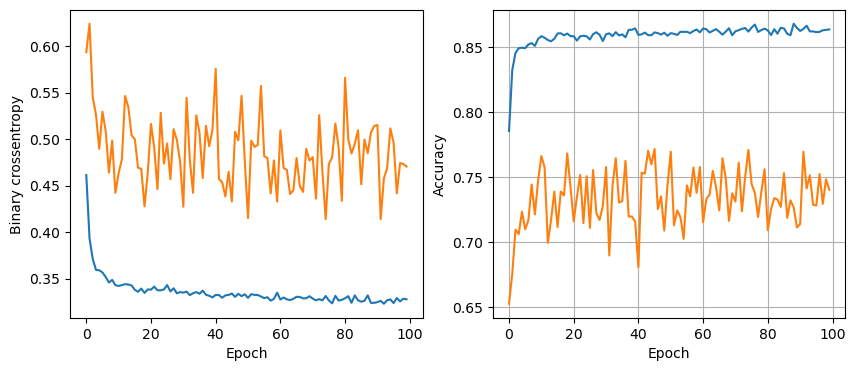

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.8731 - loss: 0.2981
16 nodes, dropout 0.2, lr 0.01, batch_size 128


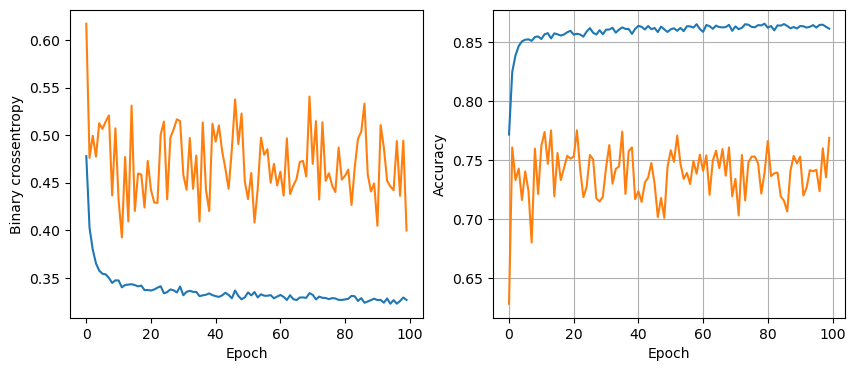

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.8773 - loss: 0.3011
16 nodes, dropout 0.2, lr 0.005, batch_size 32


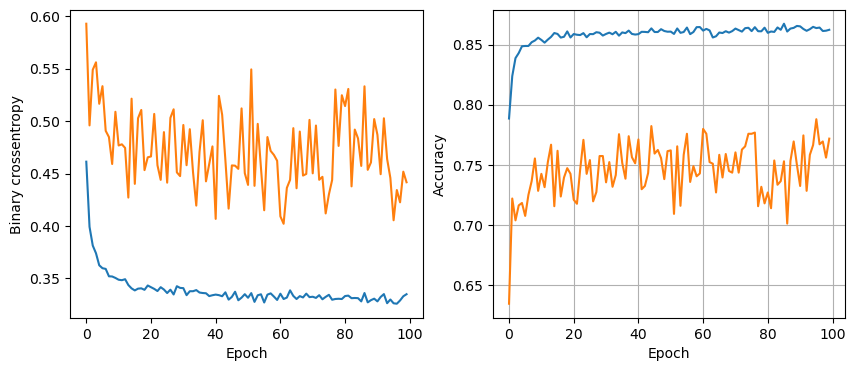

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.8751 - loss: 0.2957
16 nodes, dropout 0.2, lr 0.005, batch_size 64


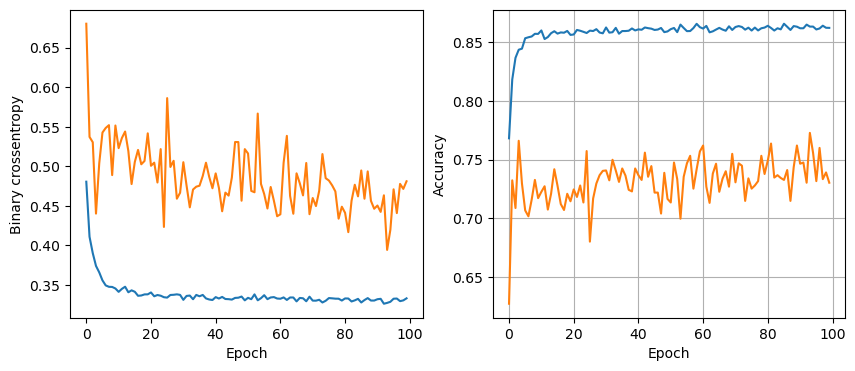

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.8728 - loss: 0.3030
16 nodes, dropout 0.2, lr 0.005, batch_size 128


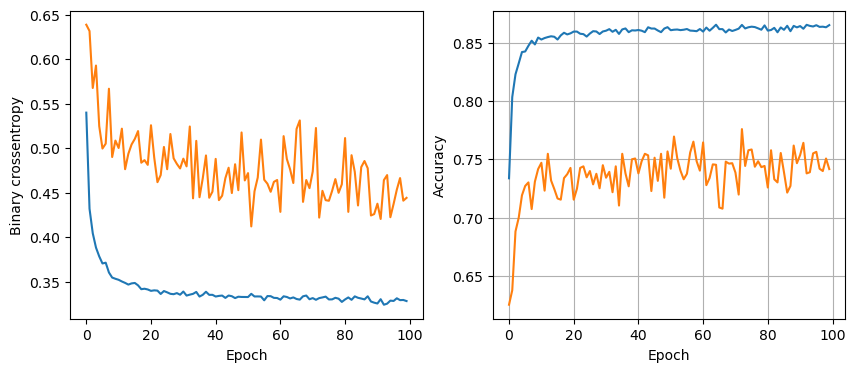

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.8764 - loss: 0.2998
16 nodes, dropout 0.2, lr 0.001, batch_size 32


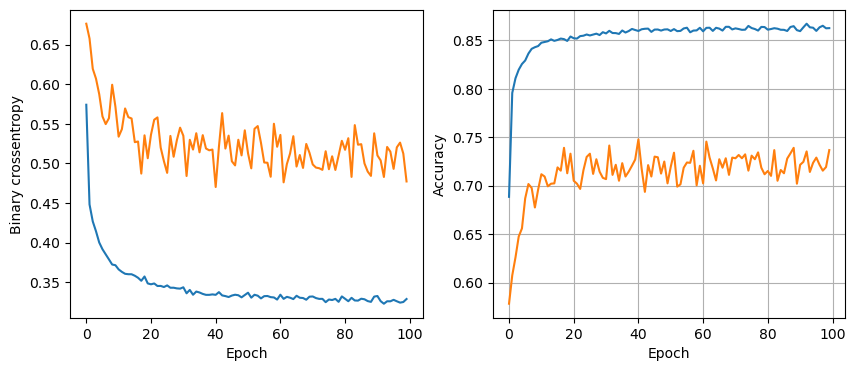

465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8716 - loss: 0.3039
16 nodes, dropout 0.2, lr 0.001, batch_size 64


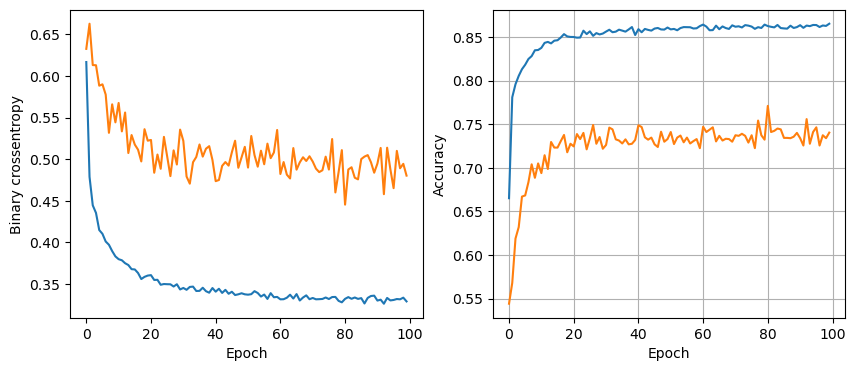

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.8751 - loss: 0.2993
16 nodes, dropout 0.2, lr 0.001, batch_size 128


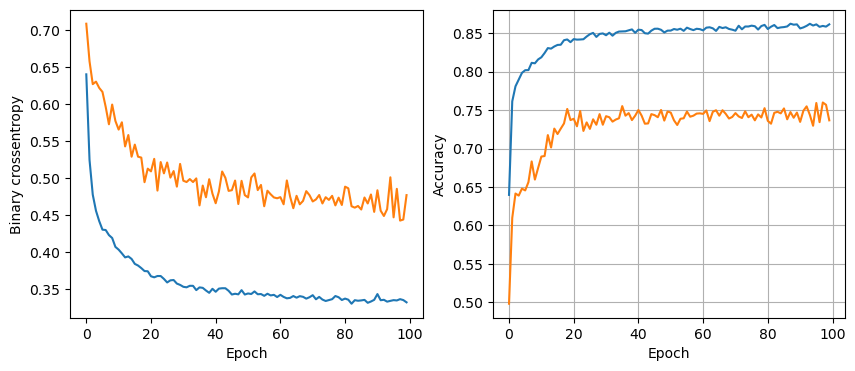

465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8734 - loss: 0.3054
32 nodes, dropout 0, lr 0.01, batch_size 32


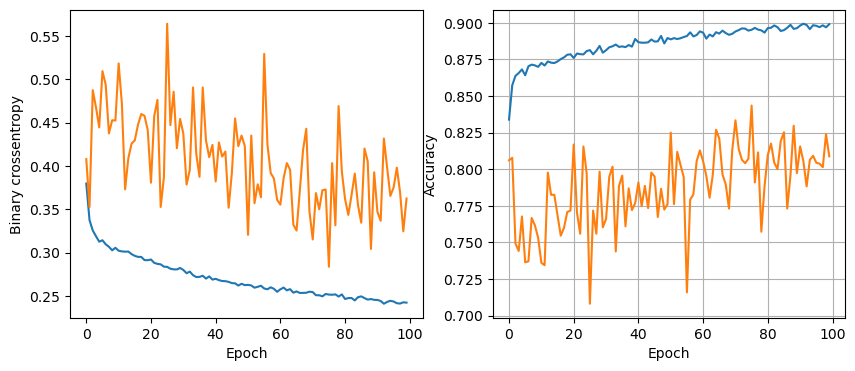

465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9045 - loss: 0.2285
32 nodes, dropout 0, lr 0.01, batch_size 64


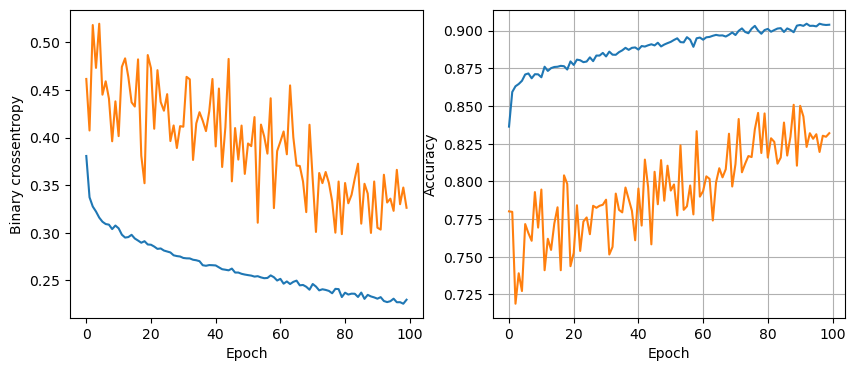

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.9067 - loss: 0.2218
32 nodes, dropout 0, lr 0.01, batch_size 128


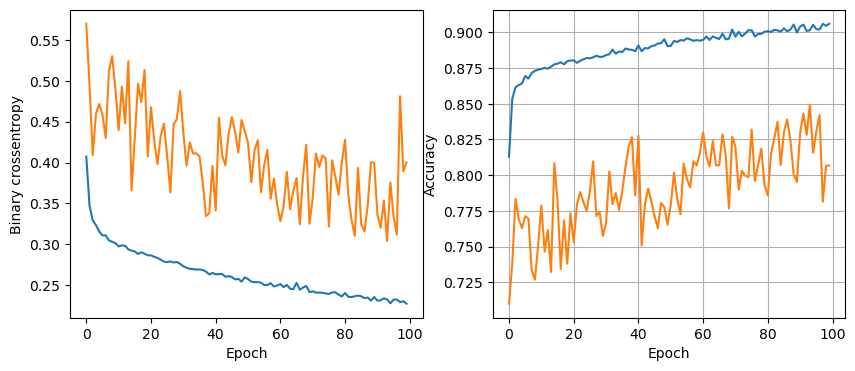

465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9086 - loss: 0.2230
32 nodes, dropout 0, lr 0.005, batch_size 32


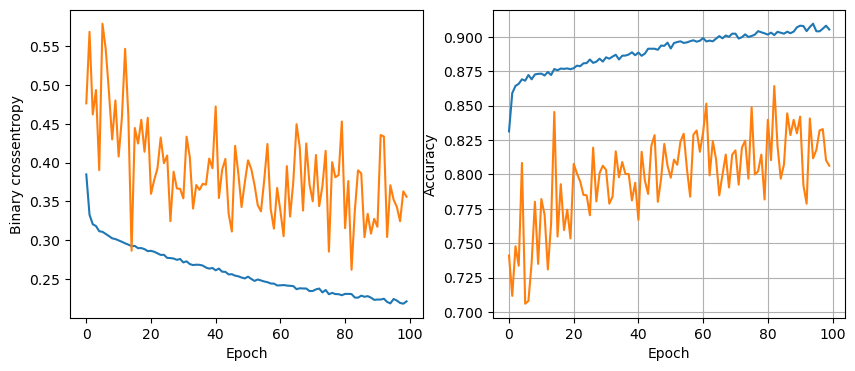

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9108 - loss: 0.2114
32 nodes, dropout 0, lr 0.005, batch_size 64


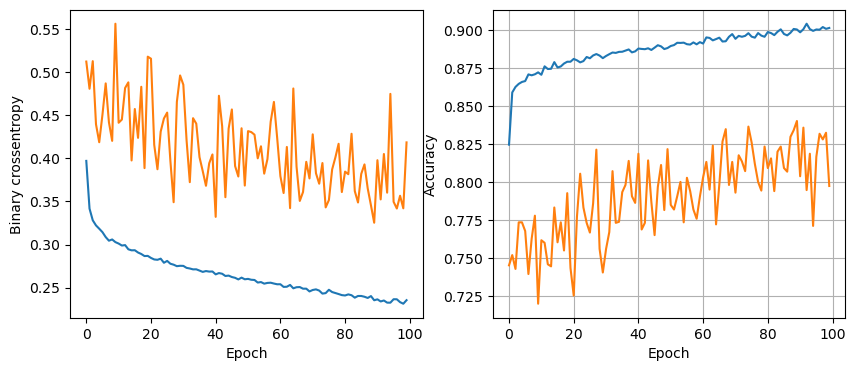

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.9020 - loss: 0.2284
32 nodes, dropout 0, lr 0.005, batch_size 128


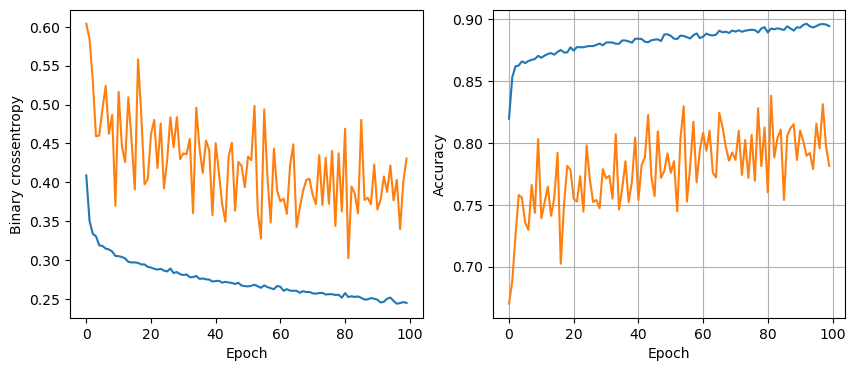

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - accuracy: 0.9001 - loss: 0.2350
32 nodes, dropout 0, lr 0.001, batch_size 32


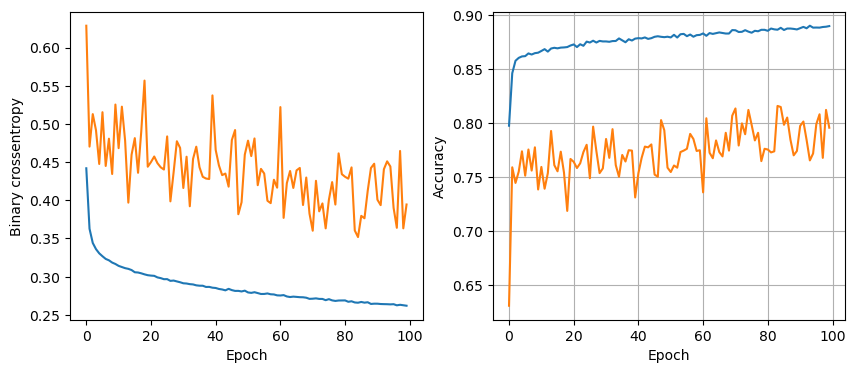

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.8923 - loss: 0.2592
32 nodes, dropout 0, lr 0.001, batch_size 64


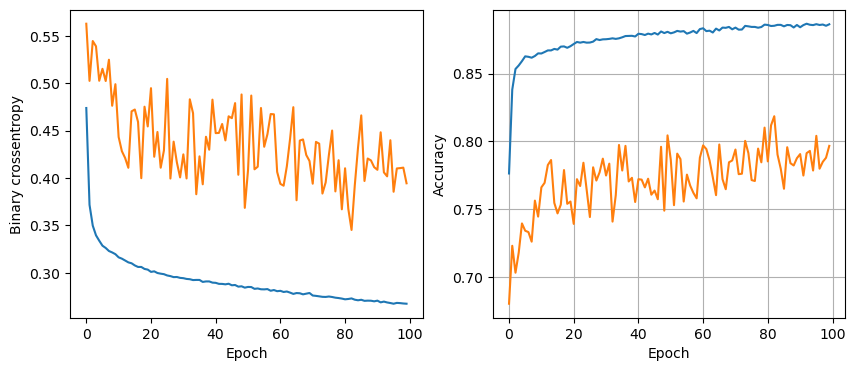

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.8883 - loss: 0.2627
32 nodes, dropout 0, lr 0.001, batch_size 128


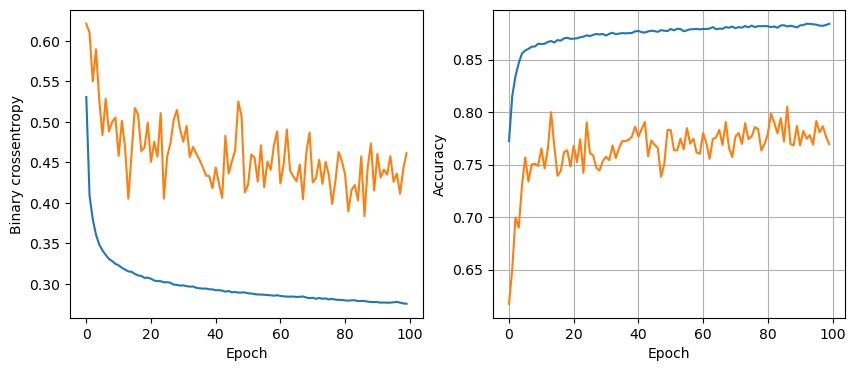

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.8851 - loss: 0.2731
32 nodes, dropout 0.2, lr 0.01, batch_size 32


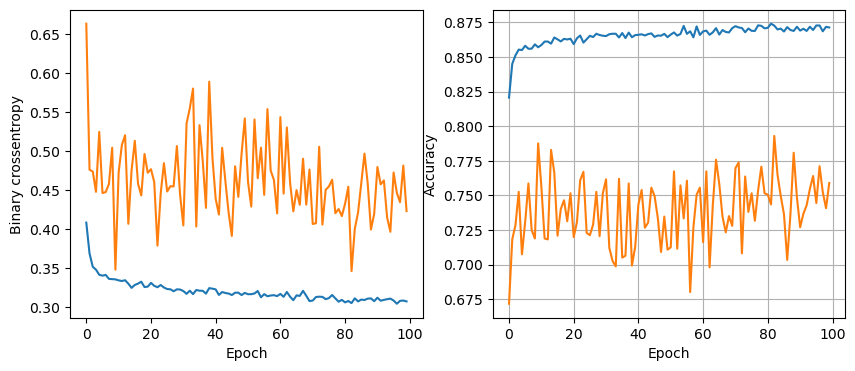

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.8833 - loss: 0.2725
32 nodes, dropout 0.2, lr 0.01, batch_size 64


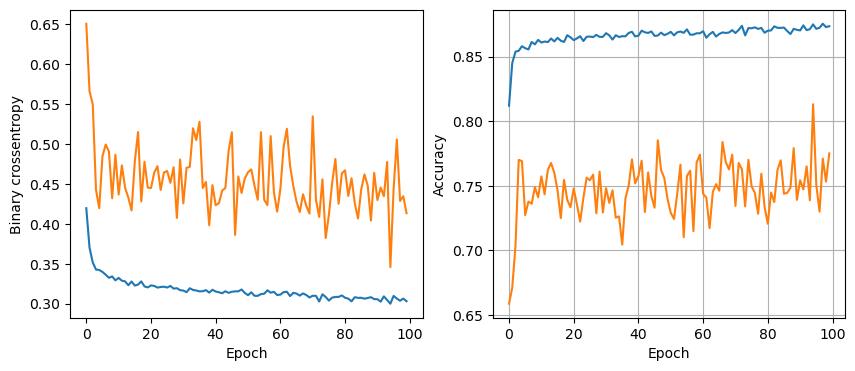

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.8847 - loss: 0.2804
32 nodes, dropout 0.2, lr 0.01, batch_size 128


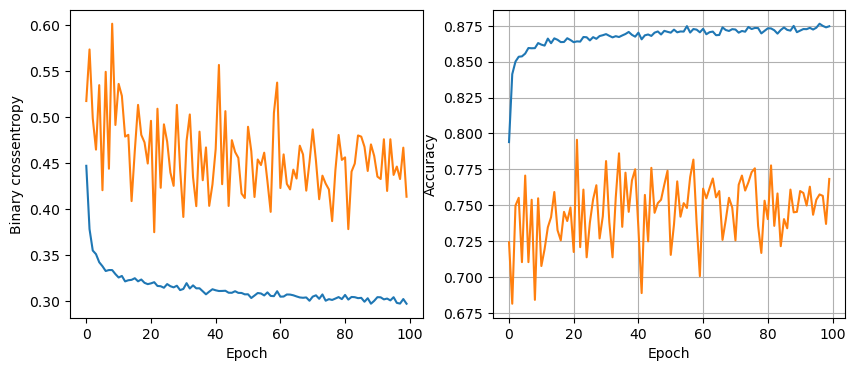

465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8847 - loss: 0.2688
32 nodes, dropout 0.2, lr 0.005, batch_size 32


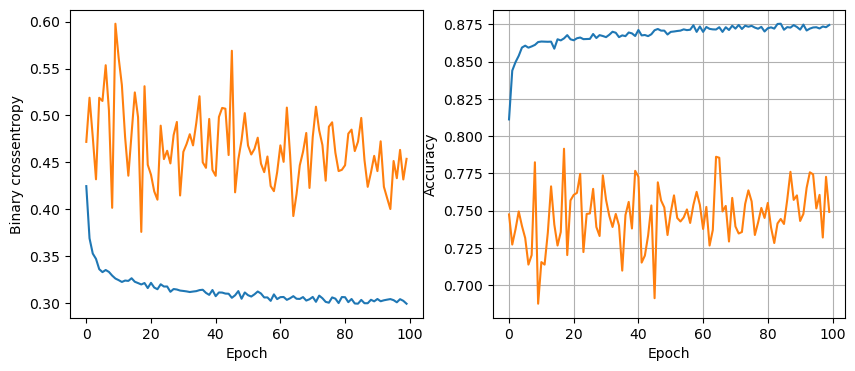

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.8860 - loss: 0.2761
32 nodes, dropout 0.2, lr 0.005, batch_size 64


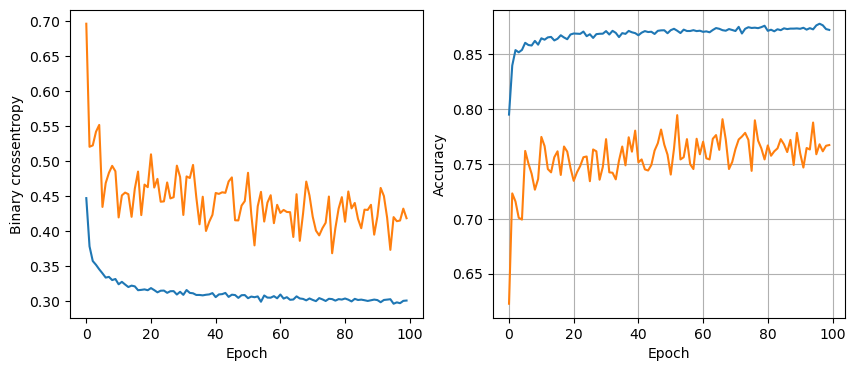

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.8879 - loss: 0.2718
32 nodes, dropout 0.2, lr 0.005, batch_size 128


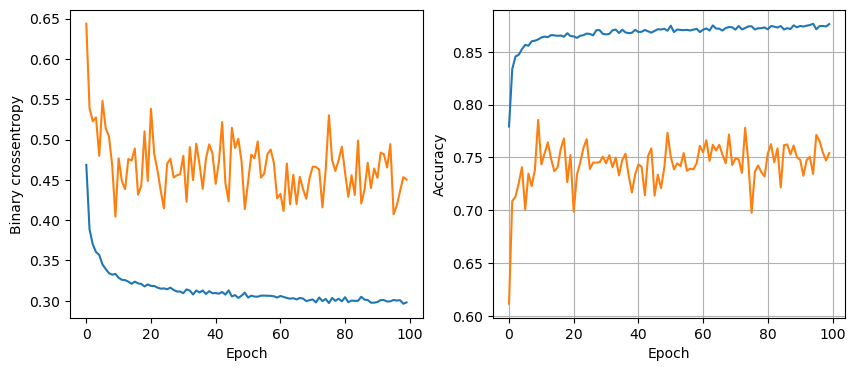

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.8828 - loss: 0.2729
32 nodes, dropout 0.2, lr 0.001, batch_size 32


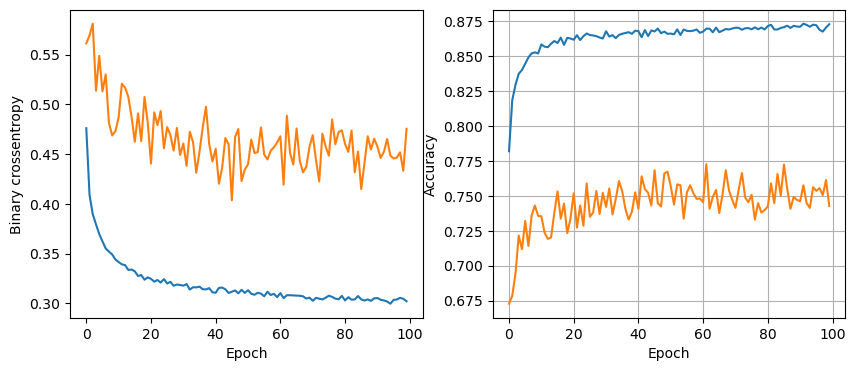

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.8790 - loss: 0.2819
32 nodes, dropout 0.2, lr 0.001, batch_size 64


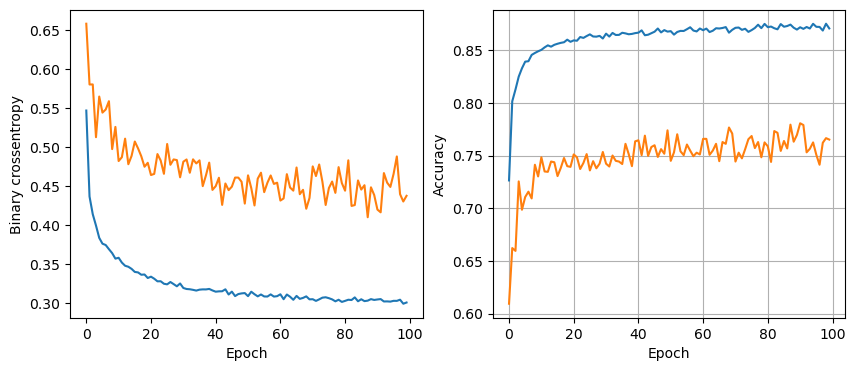

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.8818 - loss: 0.2789
32 nodes, dropout 0.2, lr 0.001, batch_size 128


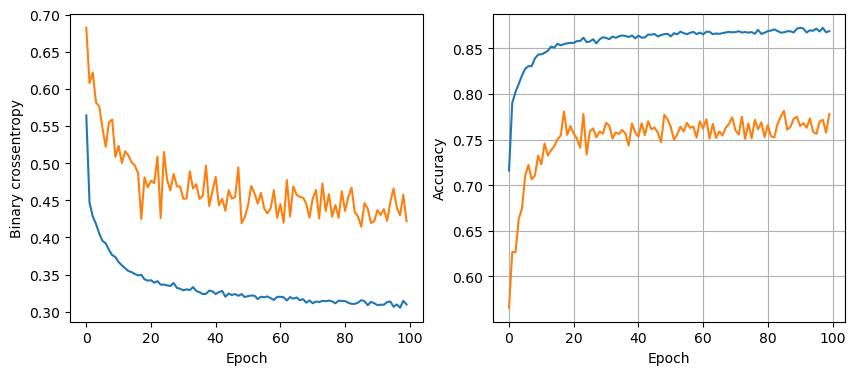

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8808 - loss: 0.2874
64 nodes, dropout 0, lr 0.01, batch_size 32


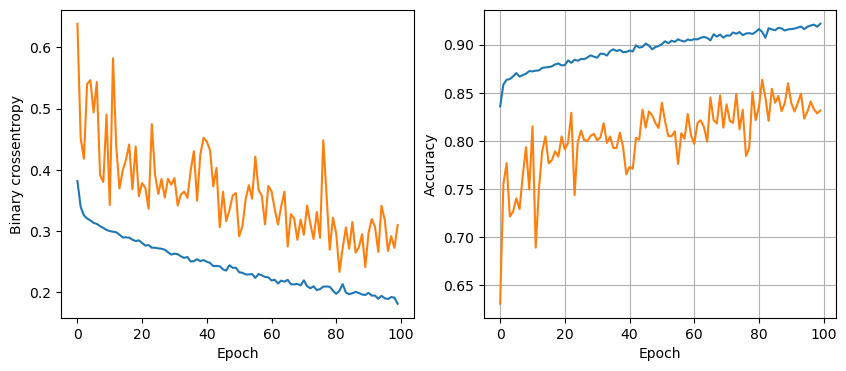

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.9245 - loss: 0.1788
64 nodes, dropout 0, lr 0.01, batch_size 64


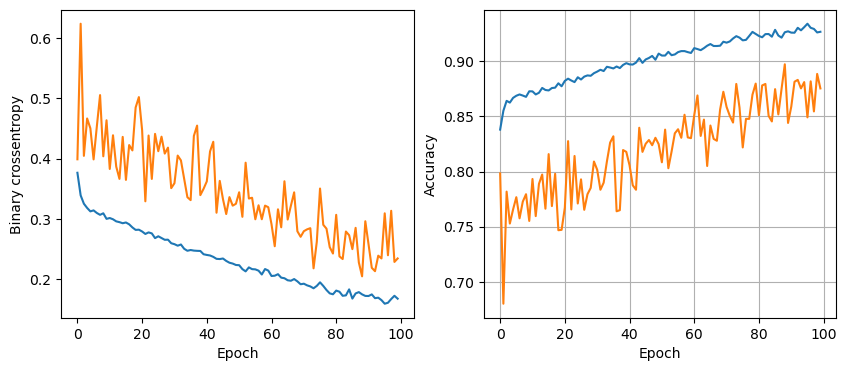

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.9345 - loss: 0.1502
64 nodes, dropout 0, lr 0.01, batch_size 128


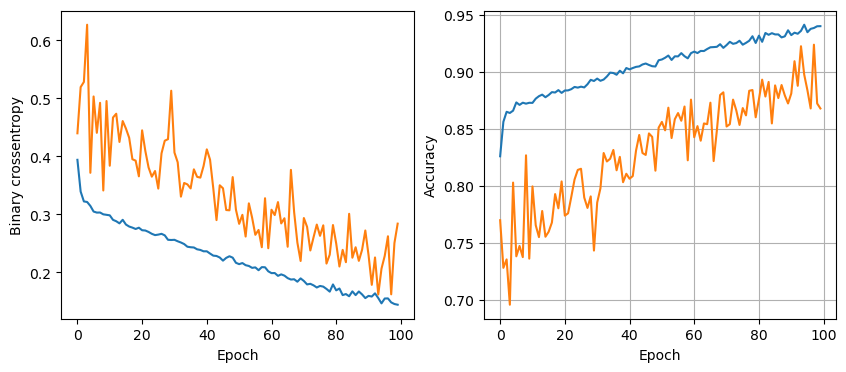

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.9402 - loss: 0.1431
64 nodes, dropout 0, lr 0.005, batch_size 32


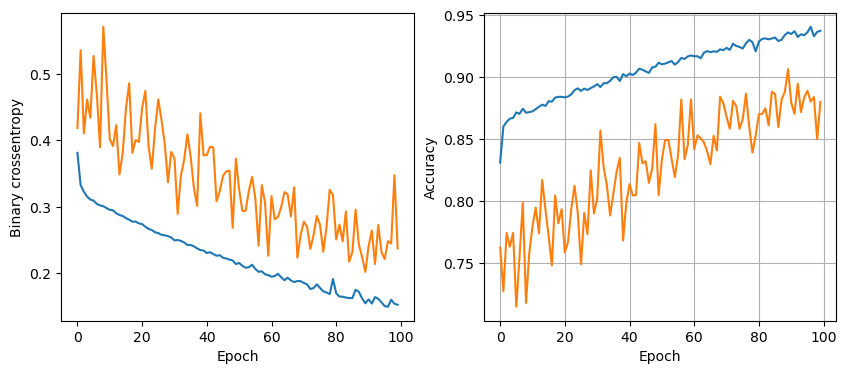

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.9423 - loss: 0.1359
64 nodes, dropout 0, lr 0.005, batch_size 64


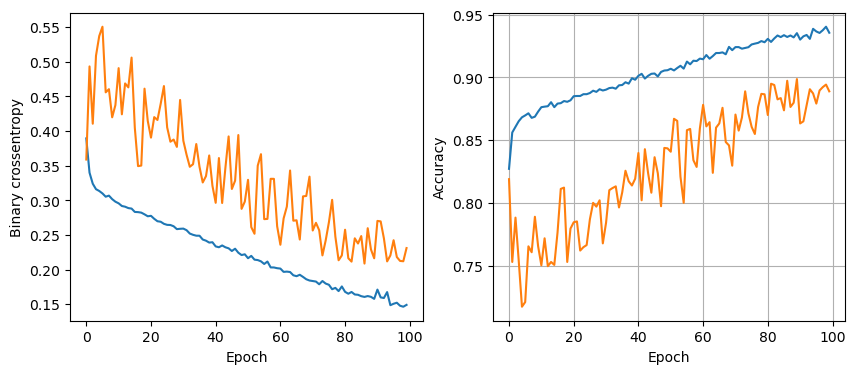

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.9451 - loss: 0.1422
64 nodes, dropout 0, lr 0.005, batch_size 128


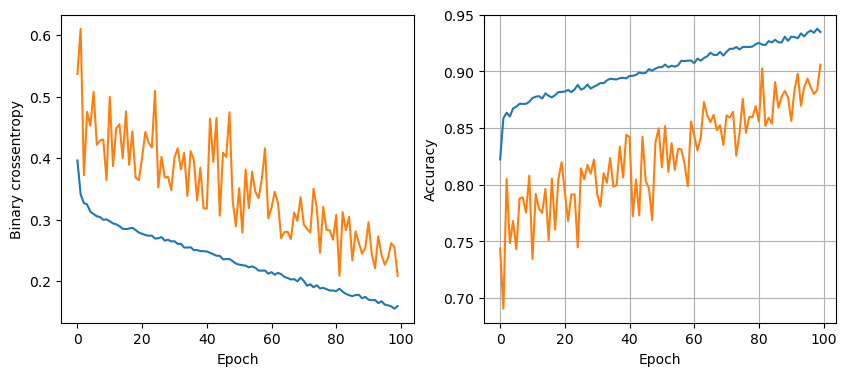

465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9400 - loss: 0.1548
64 nodes, dropout 0, lr 0.001, batch_size 32


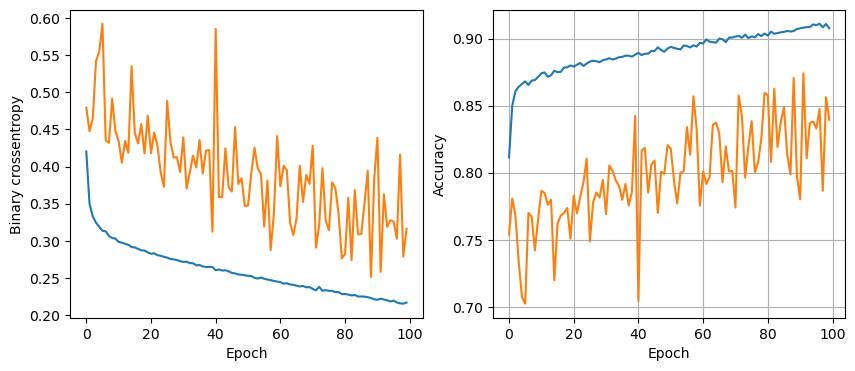

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.9152 - loss: 0.2047
64 nodes, dropout 0, lr 0.001, batch_size 64


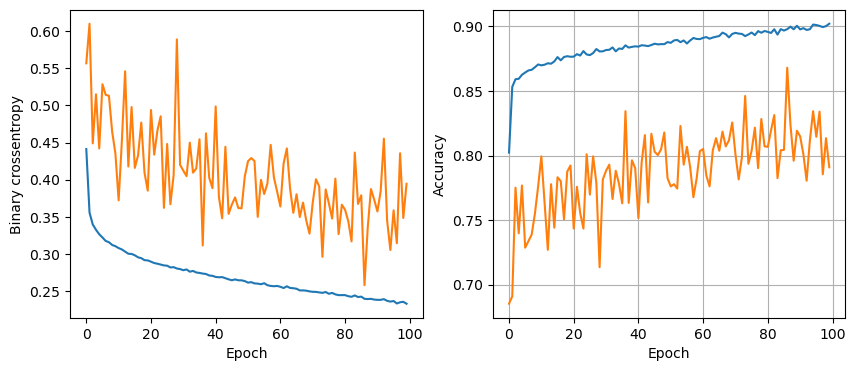

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.8993 - loss: 0.2330
64 nodes, dropout 0, lr 0.001, batch_size 128


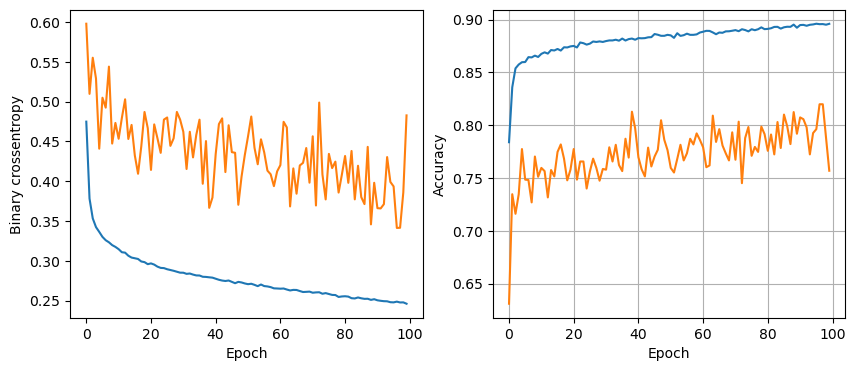

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.8946 - loss: 0.2481
64 nodes, dropout 0.2, lr 0.01, batch_size 32


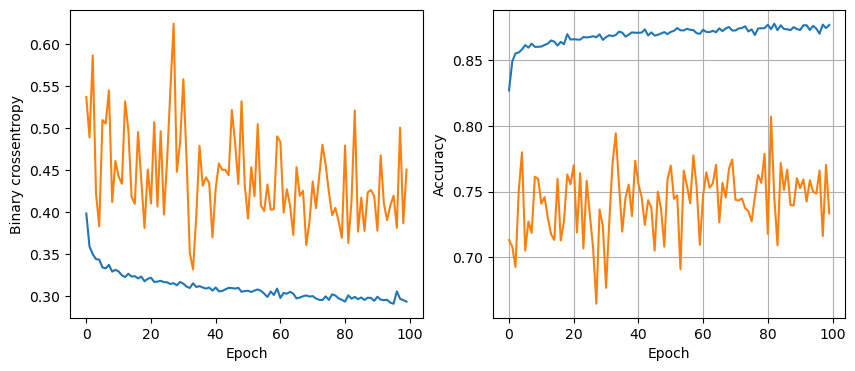

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.8844 - loss: 0.2659
64 nodes, dropout 0.2, lr 0.01, batch_size 64


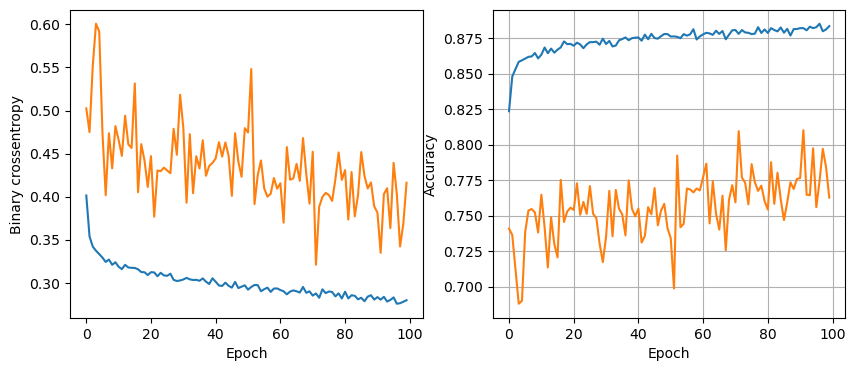

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.8946 - loss: 0.2495
64 nodes, dropout 0.2, lr 0.01, batch_size 128


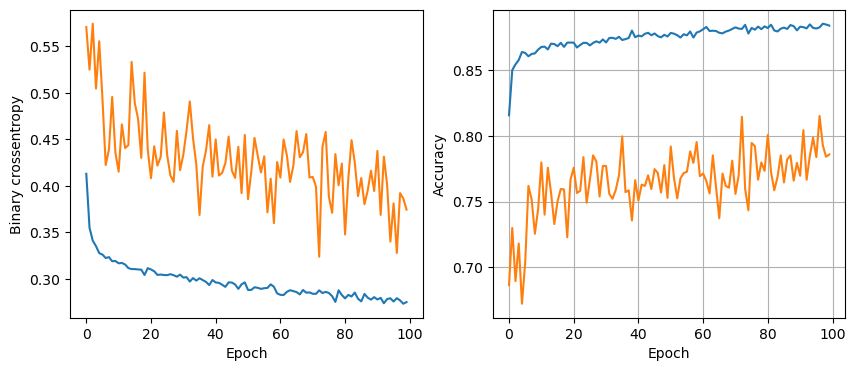

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.8987 - loss: 0.2423
64 nodes, dropout 0.2, lr 0.005, batch_size 32


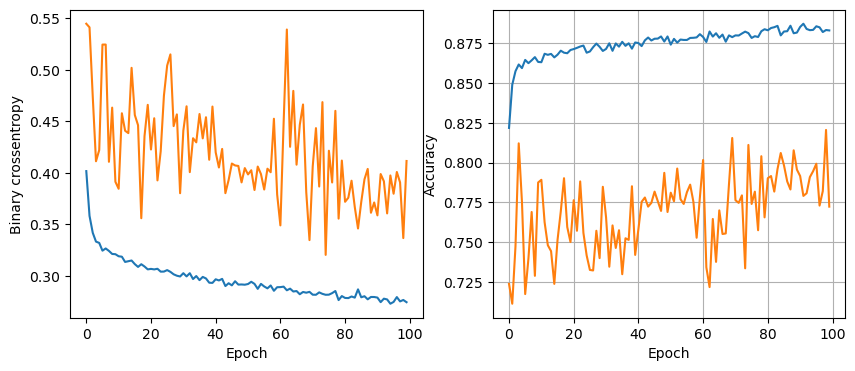

465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8983 - loss: 0.2476
64 nodes, dropout 0.2, lr 0.005, batch_size 64


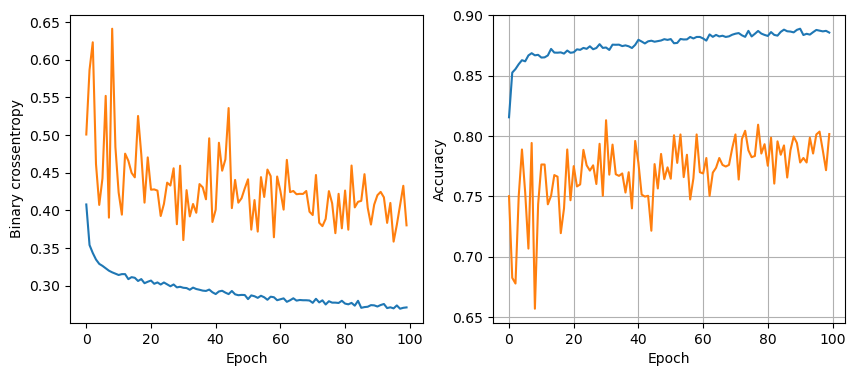

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.9028 - loss: 0.2403
64 nodes, dropout 0.2, lr 0.005, batch_size 128


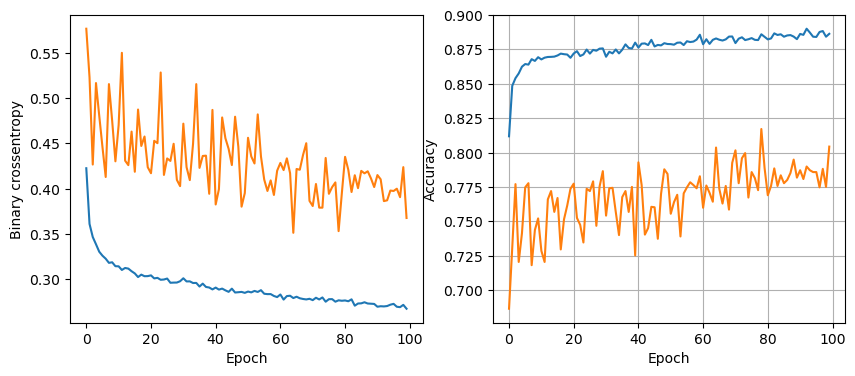

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.8997 - loss: 0.2419
64 nodes, dropout 0.2, lr 0.001, batch_size 32


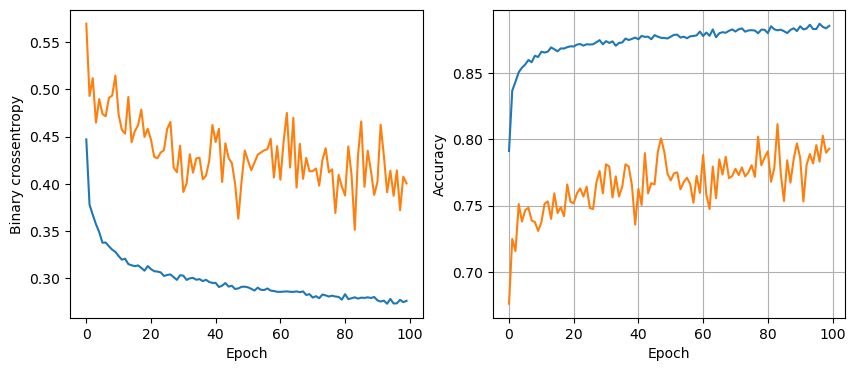

465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8964 - loss: 0.2500
64 nodes, dropout 0.2, lr 0.001, batch_size 64


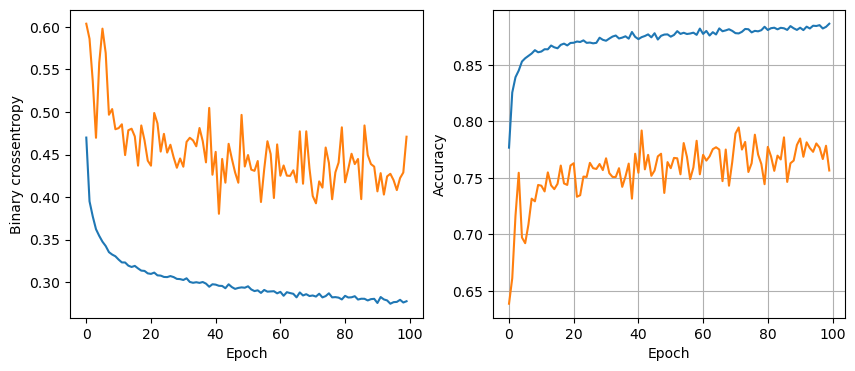

465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8907 - loss: 0.2560
64 nodes, dropout 0.2, lr 0.001, batch_size 128


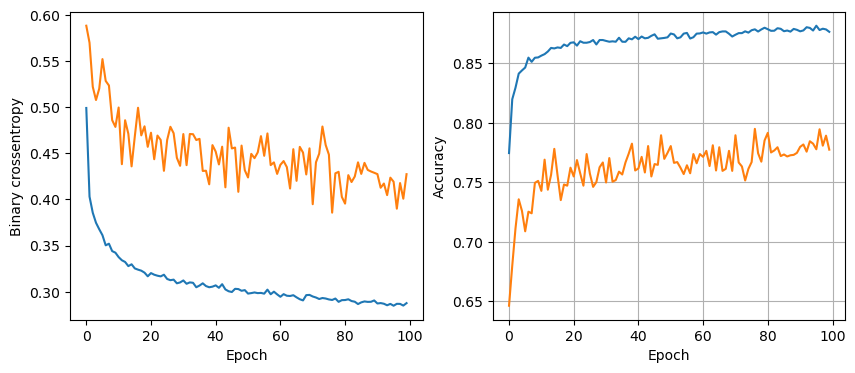

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8889 - loss: 0.2658  


In [37]:
#running a grid search to find the best hyperparameters
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}")
                model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(x_train, y_train)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [43]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.8).astype(int).reshape(-1,)
print(classification_report(y_test, y_pred))
# seems like SVM performed much better

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.72      0.85      0.78      1369
           1       0.90      0.81      0.86      2435

    accuracy                           0.82      3804
   macro avg       0.81      0.83      0.82      3804
weighted avg       0.84      0.82      0.83      3804

